<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

В данном проекте подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руд будем Использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Алгоритм работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Приступим!

## Подготовка данных

In [1]:
# Начнём проект с импорта всех необходимых библиотек
import pandas as pd
import math
import sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
# Данные находятся в трёх файлах:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # обучающая выборка
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # исходные данные

In [3]:
# напишем функцию для изучения датафреймов
def research(data):

    display(data.head())
    print(data.info()) 
    display(data.describe())
    print('Количество дубликатов', data.duplicated().sum())

In [4]:
research(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Количество дубликатов 0


In [5]:
research(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Количество дубликатов 0


In [6]:
research(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Количество дубликатов 0


После первичного изучения данных, можно заметить, что столбец **data** является типом *object*, приведём его к типу *datetime*. В многих столбцах имеются пропуски. Данные приведены к змеиному регистру. Дубликаты отсутствуют.

In [7]:
#Приводим столбец date к типу datetime
#data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
#data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
#data_full['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

#Проверим
display(data_train.dtypes)
display(data_test.dtypes)
display(data_full.dtypes)

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

date                                           object
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.floatbank8_a_level      float64
primary_cleaner.state.floatbank8_b_air        float64
primary_cleaner.state.floatbank8_b_level      float64
primary_cleaner.state.floatbank8_c_air        float64
primary_cleaner.state.floatbank8_c_level      float64
primary_cleaner.state.floatbank8_d_air        float64
primary_cleaner.state.floatbank8_d_level      float64
rougher.input.feed_ag                         float64
rougher.input.feed_pb                         float64
rougher.input.feed_rate                       float64
rougher.input.feed_size                       float64
rougher.input.feed_sol                        float64
rougher.input.feed_au       

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

Столбец **data** переведён к типу *datetime*.

Так как данные индексируются датой и временем получения информации (признак date), а соседние по времени параметры часто похожи, имеет смысл заполнить недостающие данные, предпоследними известными параметрами. В этом нам поможет функция *.ffill*.  

In [8]:
data_train.ffill(axis=0)
data_test.ffill(axis=0)
data_full.ffill(axis=0)
display('Количество строк без пропусков в тренировачной выборке', len(data_train.notna()))
display('Количество строк без пропусков в тестовой выборке', len(data_test.notna()))
display('Количество строк без пропусков в исходной выборке', len(data_full.notna()))

'Количество строк без пропусков в тренировачной выборке'

14149

'Количество строк без пропусков в тестовой выборке'

5290

'Количество строк без пропусков в исходной выборке'

19439

Следующим этапом расчитаем эффективность. 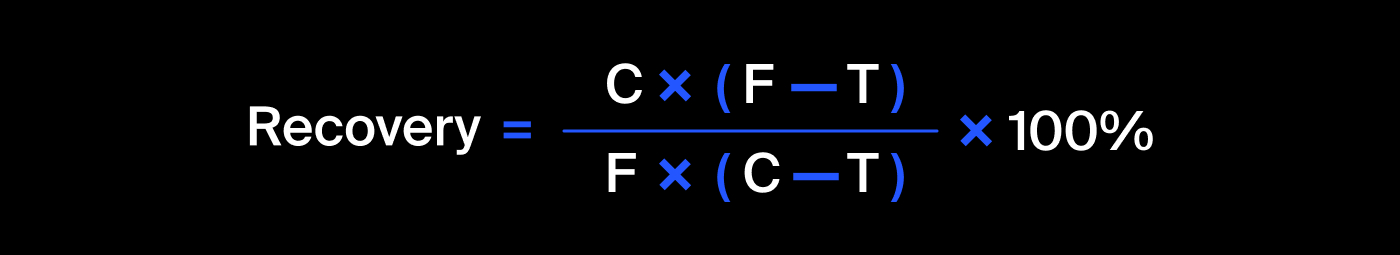
где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Таким образом нам необходимы следующие столбцы.
* С - rougher.output.concentrate_au
* F - rougher.input.feed_au
* T - rougher.output.tail_au
* Значение признака - находится в rougher.output.recovery

In [9]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100

In [10]:
display('MAE равно', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

'MAE равно'

9.73512347450521e-15

Средняя абсолютная ошибка имеет небольшое отклонение, что означает, что эфективность обогащения высчитана верно.

Проанализируем признаки недоступные в тестовой выборке.

In [11]:
missed_features = set(data_train) - set(data_test)

display('Количество отсутствующих признаков -', len(missed_features))
display(missed_features)

'Количество отсутствующих признаков -'

34

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Отсутствуют выходные параметры продукта *output* и *calculation*. Данные могут отсутствовать, по причине появления в более поздние сроки, т.к., в данный момент, они неизвестны.  
Тип данных отсутствующих признаков *float64*. 

Следующим шагом заполним целевые отсутствующие признаки продукта в тестовой выборке. Эти пропущенные данные необходимы для подсчёта метрики качества. Данные находятся в выборке *data_full*.

In [12]:
#Для объединения данных воспользуемся функцией merge, 
#а проиндексируем данные по времени поступления (воспользуемся колонкой date).
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [13]:
display('Размер тренировачной выборки', data_train.shape)
display('Размер тестовой выборки', data_test.shape)

'Размер тренировачной выборки'

(14149, 87)

'Размер тестовой выборки'

(5290, 55)

В данной главе было мы изменили тип объекта date на datetime. Обнаружили пропуски и заполнили их на предыдущие по времени. Проверили MAE, выяснили, что средняя абсолютная ошибка имеет небольшое отклонение. Выяснили, что в тестовой выборке отсутсвуют 34 значения, 2 из которых (целевые признаки) взяли  из итоговой метрики качества.

## Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

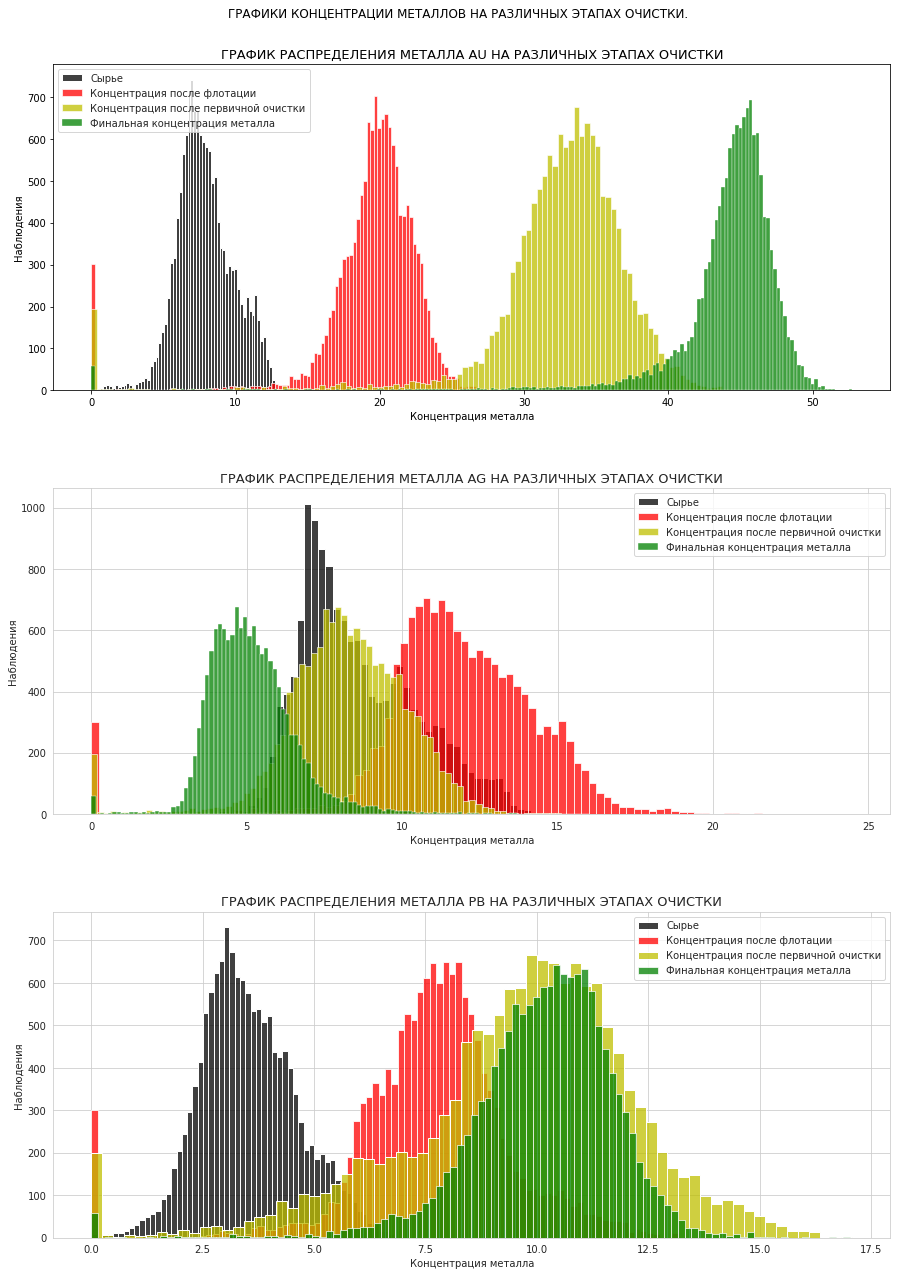

In [14]:
position = 0
plt.figure(figsize=[15, 20])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИКИ КОНЦЕНТРАЦИИ МЕТАЛЛОВ НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИСТКИ.', fontsize=12)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИСТКИ', fontsize=13)
    sns.set_style('whitegrid')
    sns.histplot(data_train[f'rougher.input.feed_{metal}'], color='black', label='Сырье', kde=False)
    sns.histplot(data_train[f'rougher.output.concentrate_{metal}'], color='r', label='Концентрация после флотации', kde=False)
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{metal}'], color='y', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(data_train[f'final.output.concentrate_{metal}'], color='g', label='Финальная концентрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Наблюдения')
    plt.legend()
plt.show();

После каждого этапа очистки металла доля *золота* **увеличивается**.  

После каждого этапа очистки металла доля *серебра* **уменьшается**.  

После каждого этапа очистки металла доля *свинца* по большей части **остаётся неизменной**.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.  
Сначала построим таблицу

In [15]:
#Таблица с размерами гранул перед флоатацией тестовой и обучающей выборок
table_rougher = pd.concat([data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size']], axis=1) 
table_rougher.columns = ['Обучающая выборка', 'Тестовая выборка']
table_rougher.describe()

,Обучающая выборка,Тестовая выборка
count,14005.000000,5289.000000
mean,60.110518,55.951097
std,22.418485,19.081758
min,9.659576,0.046369
25%,48.973027,43.906347
50%,55.373885,50.841029
75%,66.080172,62.431047
max,484.967466,392.494040


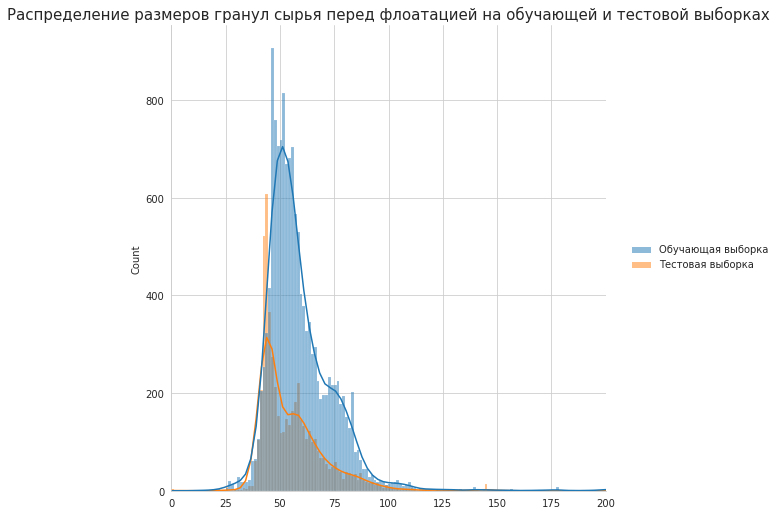

In [16]:
sns.displot(table_rougher, legend=True, kde=True, height=7)
plt.title('Распределение размеров гранул сырья перед флоатацией на обучающей и тестовой выборках', fontsize=15)
plt.xlim([0, 200])
plt.show()

Изучим размер гранул перед первичной очисткой на обучающей и тестовой выборках

In [17]:
table_primary = pd.concat([data_train['primary_cleaner.input.feed_size'], 
                                     data_test['primary_cleaner.input.feed_size']], axis=1) 
table_primary.columns = ['Обучающая выборка', 'Тестовая выборка']
table_primary.describe()

,Обучающая выборка,Тестовая выборка
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


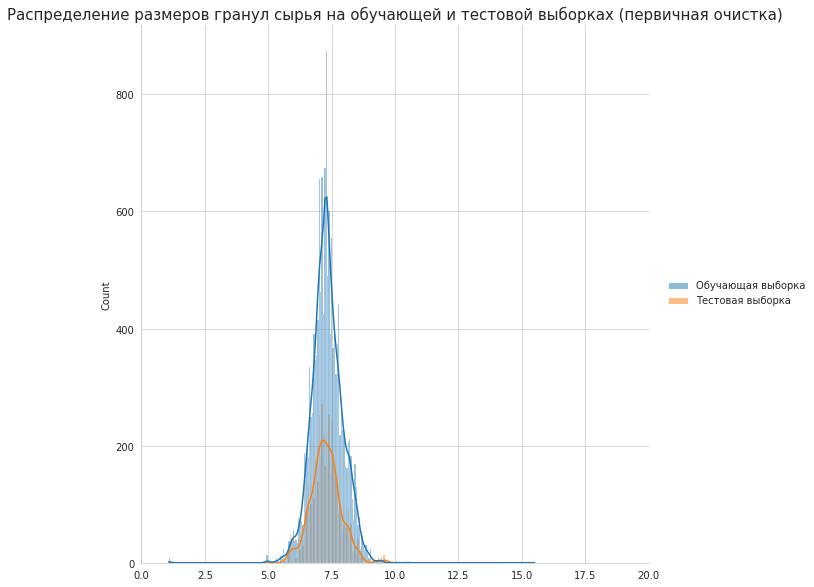

In [18]:
sns.displot(table_primary, legend=True, kde=True, height=8)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (первичная очистка)', fontsize=15)
plt.xlim([0, 20])
plt.show()

Глядя на таблицы, отмечаем, что размеры гранул сырья на обучающей и тестовой выборках отличаются слабо (берём в расчет медиану и средние значения). Присутствующие значения не должны повлиять на итоговую оценку модели.  
Имеются нулевые значения, которых быть не должно, перед построением модели нулевые аномалии необходимо удалить.

In [19]:
#Посчитаем количество нулевых значений в сырьевом варианте.
data_train[data_train['rougher.input.feed_size'] < 1]['rougher.input.feed_size'].count()

0

In [20]:
#Посчитаем количество нулевых значений перед первичной очисткой.
data_train[data_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

199

In [21]:
#Удалим нулевые значения.
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] < 1].index)
data_train[data_train['primary_cleaner.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [22]:
#Проверим тоже самое на полной выборке.
display(data_full[data_full['rougher.input.feed_size'] < 1]['rougher.input.feed_size'].count())
display(data_full[data_full['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())

4

235

Для построения лучшей модели, удалим значения меньше еденицы.

In [23]:
data_full = data_full.drop(data_full[data_full['rougher.input.feed_size'] < 1].index)
data_full = data_full.drop(data_full[data_full['primary_cleaner.output.concentrate_au'] < 1].index)

display(data_full[data_full['rougher.input.feed_size'] < 1].head())
display(data_full[data_full['primary_cleaner.output.concentrate_au'] < 1].head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [24]:
# Теперь нужно удалить пропуски, чтобы избежать ошибки во время обучения модели.
data_train.dropna(inplace=True)

In [25]:
# Теперь нужно удалить пропуски из тестовой выборки, чтобы избежать ошибки во время проверки модели.
data_test.dropna(inplace=True)

Также, во избежание ошибок, необходимо удалить признаки отсутсвующие в тренировачной выборке.

In [26]:
features_to_delete = missed_features - set(['rougher.output.recovery','final.output.recovery'])
display('Количество признаков для удаления из тренировочной выборки', len(features_to_delete))

'Количество признаков для удаления из тренировочной выборки'

32

In [27]:
data_train = data_train.drop(columns=features_to_delete, axis=1)

В данной главе изучили этапы очистки металлов (золото, после каждого этапа, увеличивается; серебро уменьшается; свинец не меняется). Изучили размеры гранул на двух выборках, распределения отличаются слабо, что не должно повлиять на финальную оценку. Обнаружили аномалии в обучающей и исходной выборках, удалили аномалии и пропуски. Также было необходимо удалить признаки из тренировачной выборки для уравновешивания выборок и избежания ошибок. 

Рассмотрим суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом, после первичной обработки и финальном концентратах.

In [28]:
data_full['rougher_feed'] = data_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
data_full['rougher_concentrate'] = data_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
data_full['primary_concentrate'] = data_full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
data_full['final_concentrate'] = data_full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

In [29]:
data_full[['rougher_feed', 'rougher_concentrate', 'primary_concentrate', 'final_concentrate']].describe()

,rougher_feed,rougher_concentrate,primary_concentrate,final_concentrate
count,19200.000000,19200.000000,19200.000000,19200.000000
mean,57.186729,68.189607,61.362699,68.671094
std,7.610688,12.498075,7.742899,7.310733
min,0.040000,0.000000,1.965880,0.000000
25%,53.538131,66.045412,59.063120,67.934733
50%,57.582546,70.193345,62.568665,69.607112
75%,61.941852,74.364889,65.704829,71.383252
max,76.978947,88.140119,80.749343,80.210644


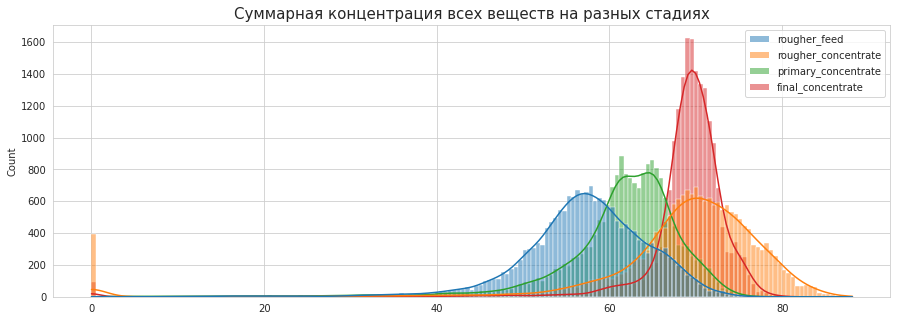

In [30]:
plt.figure(figsize=[15, 5])
sns.histplot(data_full[['rougher_feed', 'rougher_concentrate', 'primary_concentrate', 'final_concentrate']], legend=True, kde=True)
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

По графику замечаем, что есть вещества, которые на любой из стадий равны 0, что технологически невозможно. Эти данные нужно удалить.

In [31]:
len(data_full[data_full['rougher_feed'] == 0]) + len(data_full[data_full['rougher_concentrate'] == 0]) + len(data_full[data_full['primary_concentrate'] == 0]) + len(data_full[data_full['final_concentrate'] == 0])

481

481 - сумма общих значений равных нулю.

In [33]:
#Удаляем нулевые значения (Используется цикловый код)
for col in ['rougher_feed', 'rougher_concentrate', 'primary_concentrate', 'final_concentrate']:
    data_full = data_full[data_full[col]>0]

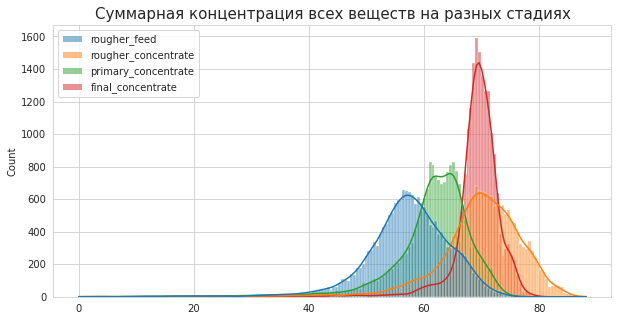

In [34]:
# И проверим на графике. (Нулевых значений нет) 
plt.figure(figsize=[10, 5])
sns.histplot(data_full[['rougher_feed', 'rougher_concentrate', 'primary_concentrate', 'final_concentrate']], legend=True, kde=True)
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

In [35]:
#train = train.set_index('date')
#full = full.set_index('date')
#train = train.loc[train.index.isin(full.index)]


# Очистка трейн-выборки по дате из фулл-выборки
data_full = data_full.set_index('date')
data_train = data_train.set_index('date')
data_train = data_train.loc[data_train.index.isin(data_full.index)]

## Модель

Напишем функцию для вычисления итоговой sMAPE. Формула в математическом виде выглядит так:

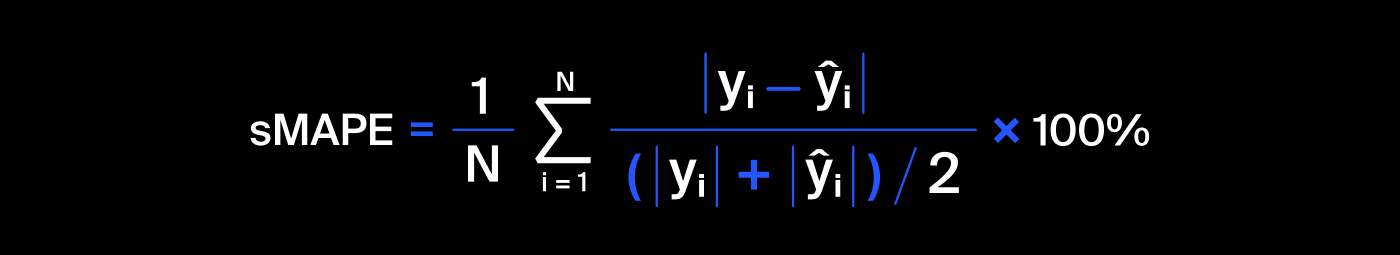

In [36]:
def smape (target, predictions):
    num = abs(predictions - target)
    den = (abs(target) + abs(predictions)) / 2
    summ = (num / den).sum()
    smape = 1 / len(target) * summ * 100
    return smape

In [37]:
smape_scorer = make_scorer(smape, greater_is_better = False)

In [38]:
def end_smape (smape_rougher, smape_final):
    end_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return end_smape

In [39]:
#Разделим датафреймы

# train
target_rougher_train = data_train['rougher.output.recovery']
target_final_train = data_train['final.output.recovery']
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# test
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']
features_test = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [40]:
# Маштабируем признаки
#numeric = features_train.columns
#scaler = StandardScaler()
#scaler.fit(features_train[numeric])
#features_train[numeric] = scaler.transform(features_train[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])

Модель **Решающее дерево**.

In [41]:
%%time

cross_val_score_rougher = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                          features_train,
                                          target_rougher_train,
                                          cv=5, scoring=smape_scorer).mean()
cross_val_score_final = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                        features_train,
                                        target_final_train,
                                        cv=5, scoring=smape_scorer).mean()
final_smape_result = end_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', final_smape_result)

Итоговое sMAPE: -12.169053542908799
CPU times: user 5.95 s, sys: 17.5 ms, total: 5.97 s
Wall time: 5.97 s


Модель **Случайный лес**.

In [42]:
%%time


for depth in range (3, 4): #выбраны самые удачные параметры
    
    for estimator in range(10, 11):
        
        model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator, 
                                       max_depth=depth) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=4, scoring=smape_scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=4, scoring=smape_scorer).mean()

        final_smape_result = end_smape(cross_val_score_rougher, cross_val_score_final)    
print('Итоговое sMAPE:', final_smape_result)

Итоговое sMAPE: -9.264815045339985
CPU times: user 5.82 s, sys: 18.7 ms, total: 5.84 s
Wall time: 5.85 s


Модель **Линейная регрессия**.

In [43]:
%%time

cross_val_score_rougher = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=smape_scorer).mean()
cross_val_score_final = cross_val_score(LinearRegression(),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=smape_scorer).mean()
final_smape_result = end_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', final_smape_result)

Итоговое sMAPE: -9.33562709037692
CPU times: user 711 ms, sys: 1.51 s, total: 2.22 s
Wall time: 2.21 s


После обучения 3-х моделей, моделью, с самым лучшим sMAPE стала модель **Случайный лес**. Проверим sMAPE на тестовой выборке.

In [44]:
model_final = RandomForestRegressor(random_state=12345, 
                                       n_estimators=20, 
                                       max_depth=3)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

print('Итоговое sMAPE:', end_smape(smape_rougher, smape_final))

Итоговое sMAPE: 9.387830986362125


Проверим модель на адекватность используя **DummyRegressor**.

In [45]:
model = DummyRegressor(strategy='median')

model.fit(features_train, target_rougher_train)
predictions_rougher = model.predict(features_test)

model.fit(features_train, target_final_train)
predictions_final = model.predict(features_test)

smape_rougher= smape(target_rougher_test, predictions_rougher)
smape_final= smape(target_final_test, predictions_final)

print('Итоговое sMAPE', end_smape(smape_rougher, smape_final))

Итоговое sMAPE 9.117339756665697


Показатель sMAPE на **Случайном лесе** меньше этого же показателя на константной модели. Это означает, что модель работает верно.

В данной главе опробовали трм модели для обучения модели. Самый лучший показатель sMAPE был показан у модели Случайный лес (-10.057134614854892). Также образом, проверили модель на тестовой выборке(13.023045380287247). Также проверили модель на адекватность(11.232260054691102).

Показатели sMAPE, близки к нулю, в обоих случаях (Случайный лес и Dummy), т.к. эта метрика является симметричной.


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке